# Regresi Linier - seaborn

Seaborn dapat menampilkan visual berbasis regresi linier. Engine nya menggunakan `statsmodels`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(color_codes=True)

In [2]:
# ambil dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


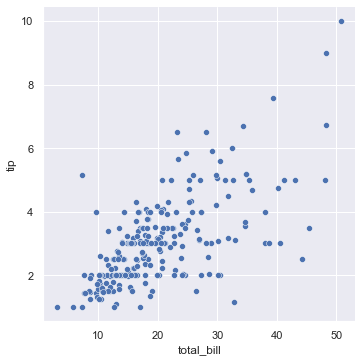

In [3]:
sns.relplot(data=tips, x="total_bill", y="tip")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

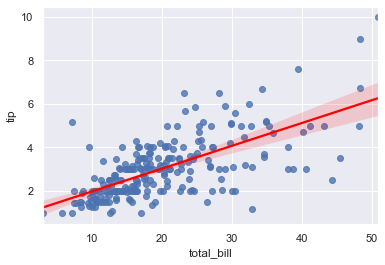

In [4]:
# regresi linier (OLS)
# info https://seaborn.pydata.org/generated/seaborn.regplot.html

sns.regplot(x="total_bill", y="tip", data=tips, line_kws={"color": "red"})

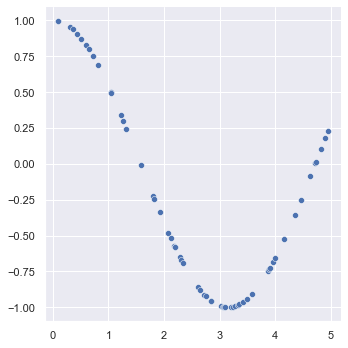

In [5]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(60, 1), axis=0)
y = np.cos(X)

sns.relplot(x=X.ravel(), y=y.ravel())

<AxesSubplot:>

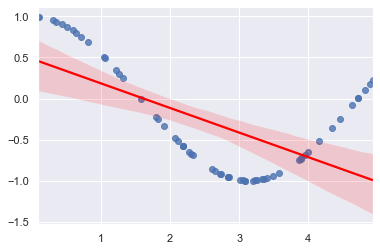

In [6]:
sns.regplot(x=X.ravel(), y=y.ravel(), line_kws={"color": "red"})

<AxesSubplot:>

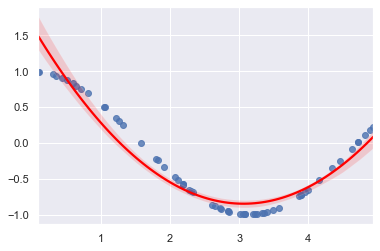

In [7]:
# order 2. y = ax^2 + bx + c

sns.regplot(x=X.ravel(), y=y.ravel(), order = 2, line_kws={"color": "red"})

<AxesSubplot:>

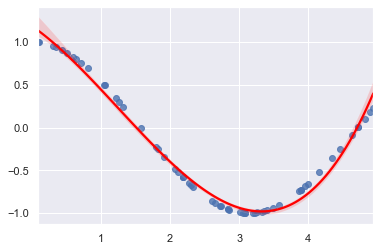

In [8]:
# order 3. y = ax^3 + bx2 + cx + d

sns.regplot(x=X.ravel(), y=y.ravel(), order = 3, line_kws={"color": "red"})

## Real Data - gapminder

### Population

In [9]:
data = "https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv"

df = pd.read_csv(data, sep='\t', dtype=({'year':int}))
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


<AxesSubplot:xlabel='year', ylabel='pop'>

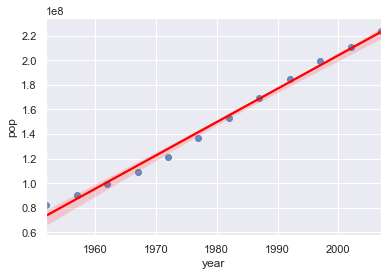

In [10]:
# populasi indonesia
indonesiaData = df[df['country'] == 'Indonesia']

sns.regplot(x="year", y="pop", data=indonesiaData, line_kws={"color": "red"})

<AxesSubplot:xlabel='year', ylabel='pop'>

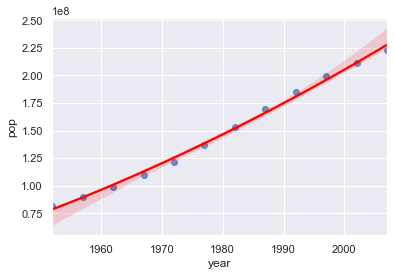

In [11]:
# order 2
sns.regplot(x="year", y="pop", data=indonesiaData, order=2, line_kws={"color": "red"})

<AxesSubplot:xlabel='year', ylabel='pop'>

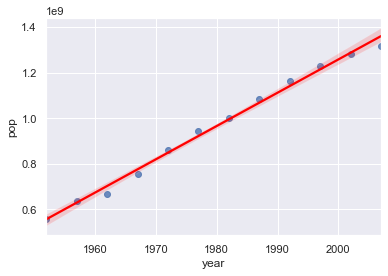

In [12]:
# populasi china
chinaData = df[df['country'] == 'China']

sns.regplot(x="year", y="pop", data=chinaData, line_kws={"color": "red"})

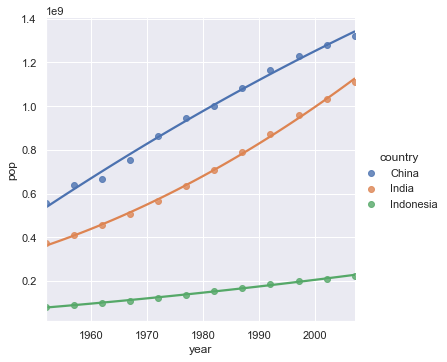

In [13]:
# 3 besar
topeucountries = ['China','India','Indonesia']
regData = df[df['country'].isin(topeucountries)]

sns.lmplot(x="year", y="pop", data=regData, hue='country', order=2, ci=False)

### GDP

Text(0.5, 1.0, 'order=2')

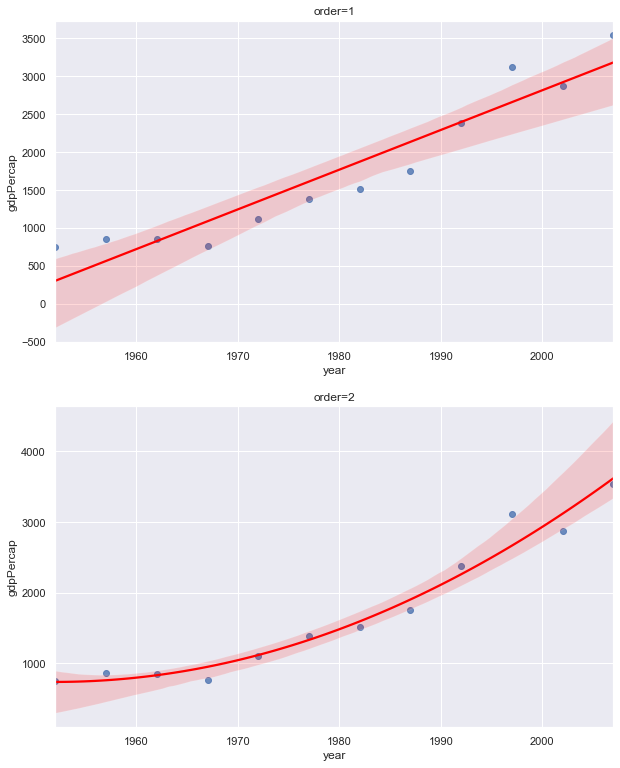

In [14]:
# populasi indonesia
indonesiaData = df[df['country'] == 'Indonesia']

fig, axes = plt.subplots(2, 1,figsize=(10,13))
sns.regplot(x="year", y="gdpPercap", data=indonesiaData, line_kws={"color": "red"}, ax = axes[0])
axes[0].set_title('order=1')
sns.regplot(x="year", y="gdpPercap", data=indonesiaData, order=2, line_kws={"color": "red"}, ax = axes[1])
axes[1].set_title('order=2')

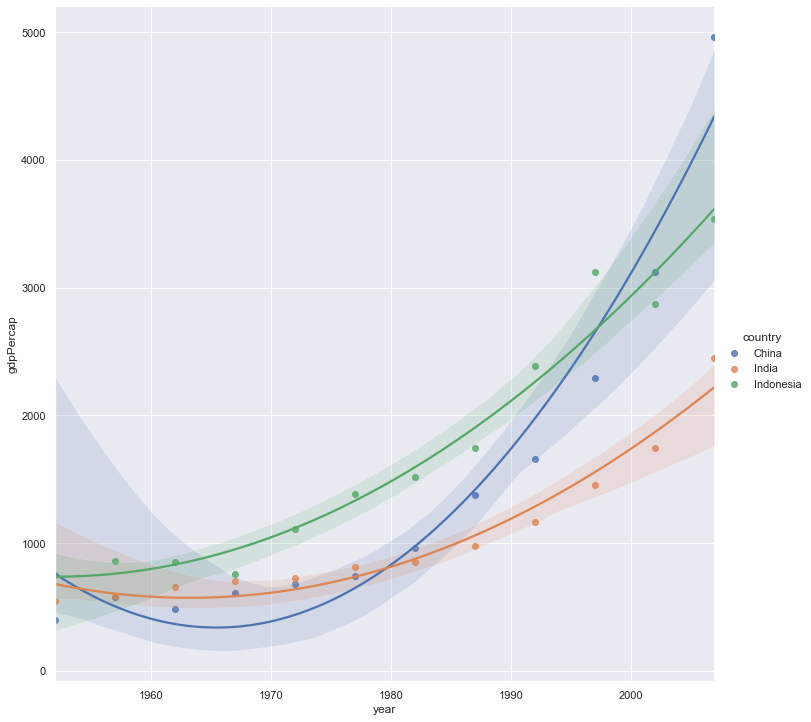

In [15]:
# 3 besar
sns.set_theme(color_codes=True)
topeucountries = ['China','India','Indonesia']
regData = df[df['country'].isin(topeucountries)]


sns.lmplot(x="year", y="gdpPercap", data=regData, hue='country', order=2,height=10)